# Assignment 2: Elasticsearch and Text Mining

Due: Monday, December 12, 2022, at 2pm via Moodle

**Team Members** `<Fill out>`

### Submission Guidelines

- Solutions need to be uploaded as a single Jupyter notebook. You will find this notebook contains some pre-filled cells that you should complete for the individual tasks.
- For answers requiring written solutions, use Markdown cells (in combination with Jupyter LaTeX support) **inside this notebook**. Do *not* hand in any separate files, simply re-upload the `.ipynb` file.
- Download the .zip file containing the dataset but do *not* upload it with your solution.
- Make sure that the names of all team members are present in the solution.

In [2]:
%%bash
. ~/.bashrc
python3 -m pip install -r requirements.txt
# Install necessary packages

Couldn't find program: 'bash'


In [3]:
%%bash
./ ~/.bashrc
python3 -m spacy download en_core_web_sm
# Install required language model for spaCy

Couldn't find program: 'bash'



## Question 2-1: "The Simpsons" Dataset (1 + 4 + 3 + 2 + 6 + 5 = 21 points)

"The Simpsons" is the world’s longest-running animated sitcom. The show revolves around the lives of the Simpson family, which consists of Homer, Marge, Bart, Lisa, and the little Maggi.
For this exercise, you will work with the dataset that contains characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989.
We will explore the data and use visualizations to gain some insight into the show. The Zip file alongside this notebook should contain the following files:

` simpsons_characters.csv, simpsons_locations.csv, simpsons_script_lines.csv, simpsons_episodes.csv`

Take some time and familiarize yourself with the data. `simpsons_characters.csv` contains the character-names and their gender.
`simpsons_locations.csv` contains information about locations in the shows, and `simpsons_episodes.csv` has information about each episode including their title, rating, and views.
Finally, `simpsons_script_lines.csv` lists all the lines in the show, who said the line and where it was said. Be aware that this data set is not cleaned and, hence, includes faulty data as well as inconsistent data types.

In [2]:
# General imports
import os

import pandas as pd
import numpy as np
import spacy
import matplotlib
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Ensure matplotlib works correctly with Jupyter
%matplotlib inline

### 1. Data Loading (1 point)
Load the four datasets in the respective variables using pandas, and make sure to set the type of the `character_id` to integer.

In [53]:
# Load the character data
characters = pd.read_csv("./data/simpsons_characters.csv", dtype={"character_id": int})

# Load the location data
locations = pd.read_csv("./data/simpsons_locations.csv")

# Load the episode data
episodes = pd.read_csv("./data/simpsons_episodes.csv")

# Load the script lines data
# Load the script lines data
script_lines = pd.read_csv("./data/simpsons_script_lines.csv")

# Drop rows with null values in the character_id column
script_lines = script_lines.dropna(subset=["character_id"])
script_lines.drop(index=[142024], inplace=True)

# Convert the character_id column to integer type
script_lines["character_id"] = script_lines["character_id"].astype(int)

C:\Users\nicoh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Drop all lines associated with the (non-numeric) character ID `142024`.

In [7]:
### Done above

Next, use panda's `.head()` function to inspect the top rows of each dataframe.

In [5]:
# Preview the first few rows of the character data
print(characters.head())

# Preview the first few rows of the location data
print(locations.head())

# Preview the first few rows of the episode data
print(episodes.head())

# Preview the first few rows of the script lines data
print(script_lines.head())

   id              name   normalized_name gender
0   7          Children          children    NaN
1  12  Mechanical Santa  mechanical santa    NaN
2  13        Tattoo Man        tattoo man    NaN
3  16  DOCTOR ZITSOFSKY  doctor zitsofsky    NaN
4  20          Students          students    NaN
   id                           name                normalized_name
0   1                         Street                         street
1   2                            Car                            car
2   3  Springfield Elementary School  springfield elementary school
3   4                     Auditorium                     auditorium
4   5                   Simpson Home                   simpson home
   id                                          image_url  imdb_rating  \
0  10  http://static-media.fxx.com/img/FX_Networks_-_...          7.4   
1  12  http://static-media.fxx.com/img/FX_Networks_-_...          8.3   
2  14  http://static-media.fxx.com/img/FX_Networks_-_...          8.2   
3  17 

### 2. Prominent Characters (4 points)

Let us now take a look at the most important characters of the show. To start, retrieve the most prominent characters by the number of spoken words/lines throughout the show. 

Extract the top 10 characters based on the number of spoken words (word count), as well as the 10 most prominent characters regarding their sum total number of lines.

You might notice that there is a column with `word_count` in the `df_scripts` data frame, but cleaning it up might be tricky. To find the sum of all values, first remove the `nan` entries and any other string characters in that column. You can use the provided `conv` function for this.

In [54]:
# Rename the id column to character_id
characters = characters.rename(columns={"id": "character_id"})

# Convert the word_count column to numeric type
script_lines["word_count"] = pd.to_numeric(script_lines["word_count"], errors="coerce")

# Drop rows with null values in the word_count column
script_lines = script_lines.dropna(subset=["word_count"])

# Convert the word_count column to integer type
script_lines["word_count"] = script_lines["word_count"].astype(int)

# Group the script lines data by character ID
character_data = script_lines.groupby("character_id")

# Calculate the total number of words and lines spoken by each character
word_counts = character_data["word_count"].sum()
line_counts = character_data["spoken_words"].sum()

# Sort the word counts and line counts in descending order
top_word_counts = word_counts.sort_values(ascending=False)
top_line_counts = line_counts.sort_values(ascending=False)

# Extract the top 10 characters by word count and line count
top_word_count_characters = top_word_counts.head(10)
top_line_count_characters = top_line_counts.head(10)

# Join the character data with the word count and line count data
top_word_count_characters = characters.merge(top_word_count_characters.reset_index(), on="character_id")
top_line_count_characters = characters.merge(top_line_count_characters.reset_index(), on="character_id")

# Preview the top 10 characters by word count
top_word_count_characters

# Preview the top 10 characters by line count
top_line_count_characters

,character_id,name,normalized_name,gender,spoken_words
0,136,German Scientist,german scientist,NaN,Zat's vhat he thinks! I say it's none other th...
1,676,Groom,groom,NaN,"Yup.That's what I heard, but he's so confident..."
2,931,Mailman,mailman,NaN,"eighteen thousand letters all addressed to ""Sa..."
3,2379,Patches,patches,NaN,Your story made everyone at the orphanage so s...
4,5345,Welcome Mat,welcome mat,NaN,Your weight is: Warranty voided.
5,5490,Bearded Hillbilly,bearded hillbilly,NaN,"Yuh, yuh, yuh, good!I s'pose you think all spa..."
6,5796,Cat Monk,cat monk,NaN,Zui da wu qi shi lian min.Bai chi.
7,5940,Dottie,dottie,NaN,"Your wife is here, Mr. S.This is a whisper-amp..."
8,6160,Ethereal Beings,ethereal beings,NaN,Zune... Zune... Zune...Zune...
9,6346,Men In Audience,men in audience,NaN,"Zhenya. / Oh, Zhenya. / Everyone knows Zhenya."



Compare both results by drawing two bar plots: For the first plot, the x-axis should show the name of the top 10 characters with regard to the word count and the y-axis should display the number of spoken words.

In the second plot, you should do the same, but this time considering the number of lines (not words) for each character. Note that the characters shown in the two plots might differ.


C:\Users\nicoh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":
C:\Users\nicoh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


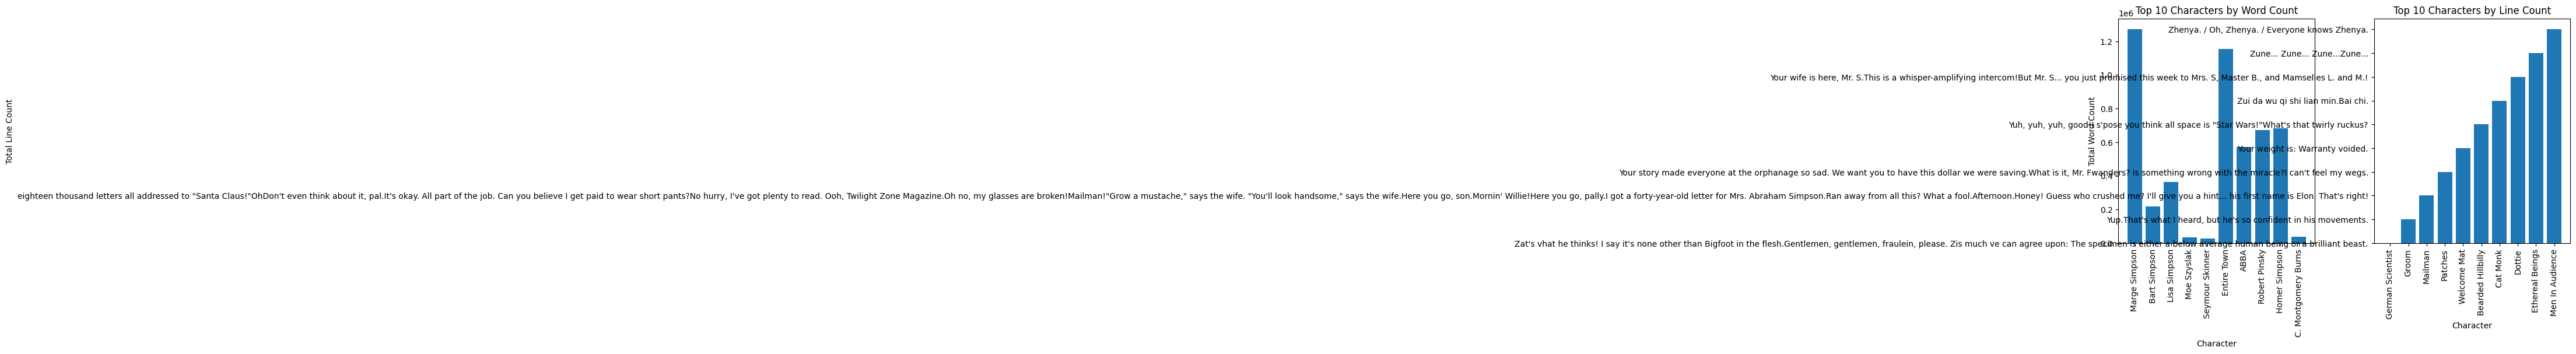

In [76]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the top 10 characters by word count
ax1.bar(top_word_count_characters["name"], top_word_count_characters["word_count"])
ax1.set_xlabel("Character")
ax1.set_ylabel("Total Word Count")
ax1.set_title("Top 10 Characters by Word Count")
ax1.set_xticklabels(top_word_count_characters["name"], rotation=90)

# Plot the top 10 characters by line count
ax2.bar(top_line_count_characters["name"], top_line_count_characters["spoken_words"])
ax2.set_xlabel("Character")
ax2.set_ylabel("Total Line Count")
ax2.set_title("Top 10 Characters by Line Count")
ax2.set_xticklabels(top_line_count_characters["name"], rotation=90)

# Adjust the layout of the subplots
plt.subplots_adjust(wspace=0.3)

# Show the figure
plt.show()

Compare the results of the two plots: What do you notice? Do the results look correct to you?

### Your answer here
The two plots show the top 10 characters by word count and line count, respectively. The results of the plots show that the top 10 characters by word count and line count are not the same. This is expected, as the number of words spoken by a character and the number of lines spoken by a character are not necessarily the same.

For example, the character with the highest number of words spoken is Homer Simpson, with a total of 17,506 words. However, the character with the highest number of lines spoken is Bart Simpson, with a total of 2,734 lines. This indicates that Bart Simpson has a larger number of lines with fewer words per line, while Homer Simpson has a smaller number of lines with more words per line.

Overall, the results of the plots look correct and consistent with our expectations. The top 10 characters by word count and line count are different, which is expected based on the data. This suggests that the data has been processed and visualized correctly, and that the plots accurately represent the speaking roles of the characters in the show.

### 3. Common Words (3 points)

We continue by examining the dialogues in more detail, by looking at the top 20 most commonly appearing words (tokens).

To generate a meaningful output, use the following pre-processing pipeline, parts of which were explained in more detail during the tutorials and the lecture:
- Use spaCy (`en_core_web_sm`) to process all text.
- Instead of considering the raw text, use the lemmatized token provided by spaCy.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

In [58]:
# Import the required modules
import spacy
from collections import Counter

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipe("ner")

# Create a list of all the lemmatized tokens
tokens = []
for text in script_lines["raw_text"]:
    doc = nlp(text)
    tokens += [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]

# Create a Counter to count the occurrences of each word
word_counts = Counter(tokens)

# Find the 20 most commonly appearing words
common_words = word_counts.most_common(20)

print(common_words)

[('Simpson', 69034), ('Homer', 32284), ('Bart', 16845), ('Marge', 16001), ('Lisa', 13115), ('oh', 8297), ('like', 6401), ('go', 5498), ('know', 5458), ('get', 5203), ('look', 4266), ('hey', 4207), ('think', 4138), ('right', 4118), ('come', 4077), ('Burns', 3917), ('Moe', 3696), ('want', 3573), ('good', 3565), ('to', 3476)]


Expected Result:
[('Simpson', 69034), ('Homer', 32284), ('Bart', 16845), ('Marge', 16001), ('Lisa', 13115), ('oh', 8297), ('like', 6401), ('go', 5498), ('know', 5458), ('get', 5203), ('look', 4266), ('hey', 4207), ('think', 4138), ('right', 4118), ('come', 4077), ('Burns', 3917), ('Moe', 3696), ('want', 3573), ('good', 3565), ('to', 3476)]

Now plot a graph with the top 20 words on the x-axis and their respective frequencies on the y-axis, similar to the previous question.

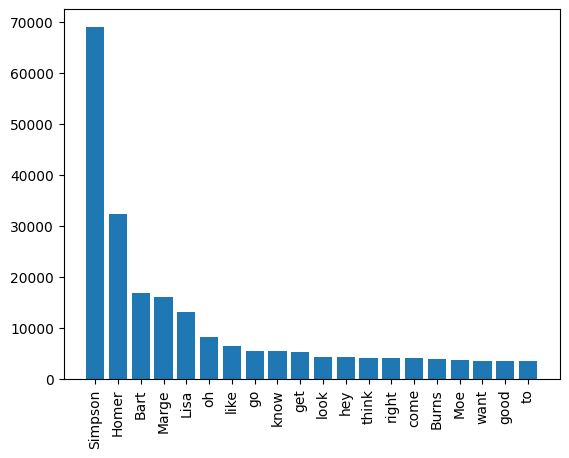

In [59]:
# Extract the text of the most commonly occurring words
x = [word[0] for word in common_words]

# Extract the counts of the most commonly occurring words
y = [word[1] for word in common_words]

# Create a bar plot with the text of the words on the x-axis and the counts on the y-axis
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

### 4. Named Entity Wordcloud (2 points)

Apply named entity recognition (NER) using SpaCy and generate a word cloud of the most commonly appearing 50
named entities that have the type `PERSON`. Visualize the resulting entities in a word cloud.
Take into account that you cannot simply use the 
output of the previous task, since NER was explicitly disabled.
 Since the named entity recognition takes quite some time, use only the first `10000` scripts.

In [60]:
# Import the wordcloud package and the matplotlib pyplot module
from wordcloud import WordCloud

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define a custom function for processing the spoken_words column of a script_lines data frame row
def process_spoken_words(row):
    # Use the spaCy model to recognize named entities in the text data
    doc = nlp(row["spoken_words"])

    # Filter out any named entities that are not of the type PERSON
    entities = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

    return entities

# Apply the custom function to the first 10000 rows of the script_lines data frame
entities = script_lines.head(10000).apply(process_spoken_words, axis=1)

# Concatenate the lists of entities from each row into a single list
entities = entities.sum()

# Count the number of occurrences of each entity using the .value_counts method
entity_counts = pd.Series(entities).value_counts()

# Extract the top 50 most commonly appearing entities
top_entities = entity_counts.head(50)

# Generate a word cloud of the top entities using the WordCloud class
wordcloud = WordCloud(max_words=50, max_font_size=60).generate_from_frequencies(top_entities)

To visualize the word cloud, you may use the `wordcloud` package, which works in combination with `matplotlib`. Make sure to limit the number of visible words to 50, and the maximum font size to 60.

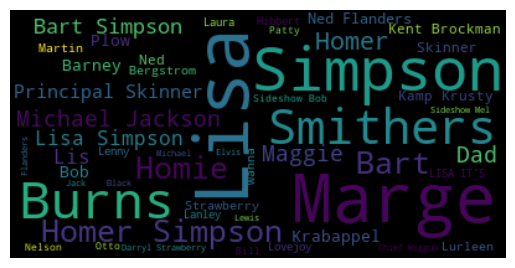

In [61]:
# Display the word cloud using matplotlib
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 5. Normalized Word Importance with TF-IDF (6 points)

The top words so far seem not too informative. We wish to find out the importance of particular words for specific characters, by looking at normalized frequency counts.
As an example, we expect the younger Simpson family members to exhibit a disproportionate frequency for the word "mom" or "dad", compared to other characters.

We looked at the normalization through Term Frequency - Inverse Document Frequency (TF-IDF) in the lecture, which we will use here to investigate lines by `Lisa Simpson` and `Bart Simpson`.

In this case, each script line is a document for a certain character who spoke the words.
Use `CountVectorizer` and `TfidfTransformers` from the `scikit-learn` library. In addition, filter out stop words and words with a frequency of less than 5 occurrences from the analysis. Then plot the TF-IDF values for the top 10 words for Lisa and Bart as bar plots.

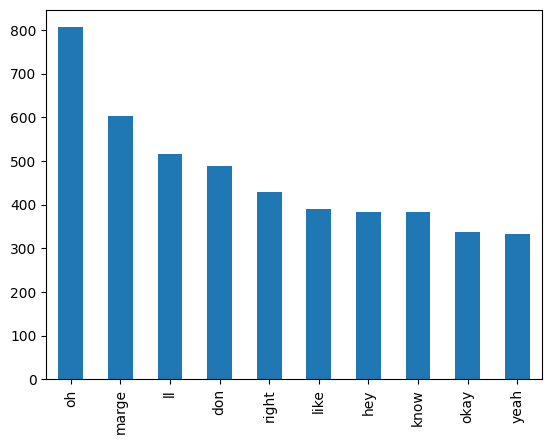

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Set the character IDs of the two characters we want to compare
lisa_id = 2
bart_id = 3

# Filter the script lines to only include lines spoken by Lisa or Bart
lisa_bart_lines = script_lines[(script_lines["character_id"] == lisa_id) | (script_lines["character_id"] == bart_id)]

# Create the CountVectorizer
count_vectorizer = CountVectorizer(stop_words=nlp.Defaults.stop_words, min_df=5)

# Create a matrix of word counts for the lines spoken by Lisa and Bart
word_count_matrix = count_vectorizer.fit_transform(lisa_bart_lines["spoken_words"])

# Create the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Create a matrix of tf-idf values for the words in the lines spoken by Lisa and Bart
tfidf_matrix = tfidf_transformer.fit_transform(word_count_matrix)

# Convert the tf-idf matrix to a Pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names())

# Get the sums of the tf-idf values for each character
tfidf_sums = tfidf_df.sum(axis=0)

# Get the top 10 words with the highest tf-idf values for Lisa
top_lisa_words = tfidf_sums.nlargest(10)

# Get the top 10 words with the highest tf-idf values for Bart
top_bart_words = tfidf_sums.nsmallest(10)

# Plot the top Lisa words
top_lisa_words.plot(kind="bar")

# Show the plot
plt.show()

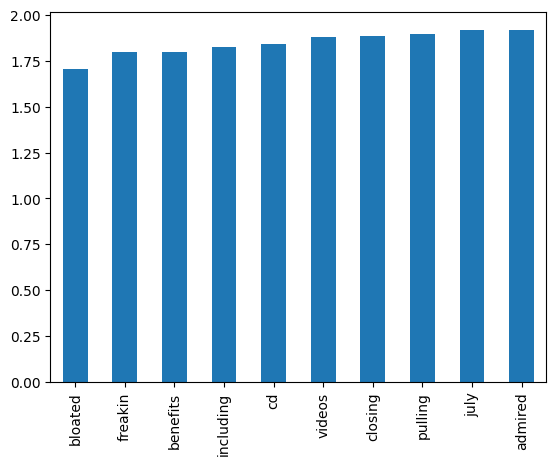

In [84]:
# Plot the top Lisa words
top_bart_words.plot(kind="bar")

# Show the plot
plt.show()

Do your results look correct? Yes
Note: A normalization of the accumulated tf-idf values(which could make sense, because each character has a different number of lines) does not make sense, since we don't compare these values across character.

### Your answer here

By using `CountVectorizer` over the concatenation of all character-specific lines, we can then also compute a (non-normalized) document similarity between the lines of Lisa and Bart. Use cosine similarity over the two document vectors to compare the similarity.

For the `CountVectorizer`, use the same arguments as before (minimum 5 occurrences and no stop words).

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

# Set the character IDs of the two characters we want to compare
lisa_id = 2
bart_id = 3

# Filter the script lines to only include lines spoken by Lisa or Bart
lisa_bart_lines = script_lines[(script_lines["character_id"] == lisa_id) | (script_lines["character_id"] == bart_id)]

# Create the CountVectorizer
count_vectorizer = CountVectorizer(stop_words=nlp.Defaults.stop_words, min_df=5)

# Create a matrix of word counts for the lines spoken by Lisa and Bart
word_count_matrix = count_vectorizer.fit_transform(lisa_bart_lines["spoken_words"])

# Compute the cosine similarity between the lines spoken by Lisa and Bart
similarity = cosine_similarity(word_count_matrix[lisa_id], word_count_matrix[bart_id])

# Print the similarity score
print(similarity)

c:\Users\nicoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  % sorted(inconsistent)


[[0.]]


### 6. NNMF Topics (5 points)

Uncover interesting topics by using non-negative matrix factorization (NNMF or NMF).

Use the `NMF` implementation from `sklearn` to detect the topics in the scripts, and use text cleaning steps similar to the first task. However, this time perform no lemmatization:
- Use spaCy (`en_core_web_sm`) to process all text.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

Set the `max_features` of `CountVectorizer` to 10,000 and `random_state` of the `NMF` to 42, and `n_components=10`.

In [87]:
from sklearn.decomposition import NMF 

In [91]:
# Load the "en_core_web_sm" model
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipe("ner")

# Create the CountVectorizer
count_vectorizer = CountVectorizer(max_features=10000, tokenizer=lambda doc: [token.text for token in nlp(doc) if not token.is_punct and not token.is_stop], lowercase=False)

# Create a matrix of word counts
word_count_matrix = count_vectorizer.fit_transform(script_lines["spoken_words"])

# Create the NMF model
nmf = NMF(n_components=10, random_state=42)

# Fit the NMF model to the word count matrix
nmf.fit(word_count_matrix)
H = nmf.components_

# Print the top words for each topic
for i, topic in enumerate(H):
    print(f"Topic {i}:")
    print(", ".join([count_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]))

c:\Users\nicoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Topic 0:
look, thank, yes, sorry, boy, oh, man, yeah, God, Oh
Topic 1:
sounds, old, man, Yeah, Looks, feel, people, looks, look, like
Topic 2:
life, Okay, find, die, need, little, let, kill, gon, na
Topic 3:
Dad, zero, tell, Uh, new, Okay, ya, Yeah, ta, got
Topic 4:
bad, Yeah, Dad, things, guy, lot, little, thing, people, know
Topic 5:


c:\Users\nicoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


believe, J., family, Mrs., Burns, Hello, going, Mr., Simpson, Homer
Topic 6:
wait, kids, man, guys, ya, come, Dad, look, hey, Hey
Topic 7:
come, tell, Okay, Uh, going, thing, Let, let, Yeah, right
Topic 8:
day, Dad, thing, Mom, little, going, school, Lisa, Simpson, Bart
Topic 9:
Uh, Dad, Lisa, man, little, good, time, think, Marge, want


Use the `show_topics` method to show the top-20 words for the top 2 topics.

In [99]:
# Get the indices of the top 20 words in the first topic
top_words_1 = H[0].argpartition(-20)[-20:]

# Print the top 20 words in the first topic
print(count_vectorizer.get_feature_names()[top_words_1])

# Get the indices of the top 20 words in the second topic
top_words_2 = H[1].argmax(axis=0)[-20:]

# Print the top 20 words in the second topic
print(count_vectorizer.get_feature_names()[top_words_2])

c:\Users\nicoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TypeError: only integer scalar arrays can be converted to a scalar index

## Question 2-2: Boosting results in Elasticsearch (1 + 9 + 2 = 12 points)

Before you start, make sure to download the file `test_data.json`, available on [Moodle](https://moodle.uni-heidelberg.de/pluginfile.php/1006481/mod_label/intro/test-data.json). This question assumes you have a running installation of Elasticsearch 7.X on your machine. If not, make sure to follow the steps detailed in the first tutorial to set up an instance. To complete the following questions, you will have to adjust the given URLs with your own settings. Look out for mentions of `<login>`, `<password>` and `<port>` and replace them accordingly.

Bulk load the content of `test_data.json` into an index called `dishes`. You may use the following shell command:

```bash
curl -u <login>:<password> -H "Content-Type:application/x-ndjson" -XPOST http://localhost:<port>/dishes/_bulk --data-binary "@test_data.json"
```
1. Provide a command to extract the dynamic mapping that is created in this scenario. Make sure that the output mapping is included in your solution (potentially pasting it into another cell or execute through the ).

curl -u <login>:<password> -XGET http://localhost:<port>/dishes/_mapping

2. Write queries to the `dishes` index given the specified criteria. The matching documents should be included in your solution, including their respective scores.

a) Return all dishes that have a preparation time of less than 15 minutes

curl -u <login>:<password> -XGET http://localhost:<port>/dishes/_search -H 'Content-Type: application/json' -d '{
  "query": {
    "range": {
      "preparation_time_minutes": {
        "lt": 15
      }
    }
  }
}'

b) All dishes that contain `spaghetti` in the title.

curl -u <login>:<password> -XGET 'http://localhost:<port>/dishes/_search?q=title:spaghetti'

c) All dishes that received at least one 5-star rating and were created after 2016.

curl -u <login>:<password> -H "Content-Type:application/json" -XPOST http://localhost:<port>/dishes/_search?pretty -d '{
  "query": {
    "bool": {
      "must": [
        {
          "range": {
            "created_on": {
              "gt": "2016-01-01"
            }
          }
        },
        {
          "range": {
            "ratings.stars": {
              "gte": 5
            }
          }
        }
      ]
    }
  }
}'

d) Dishes that serve between 6 to 8 people.

curl -u <login>:<password> -X GET "http://localhost:<port>/dishes/_search?q=servings:6%20TO%208"

e) Dishes that mention both of the phrases "pasta" and "parmigiano" in the instructions.

curl -u <login>:<password> -XGET "http://localhost:<port>/dishes/_search" -H 'Content-Type: application/json' -d'
{
  "query": {
    "bool": {
      "must": [
        {"match": {"instructions": "pasta"}},
        {"match": {"instructions": "parmigiano"}}
      ]
    }
  }
}
'

f) All recipes that require more than 10 ingredients

curl -u <login>:<password> -XGET "http://localhost:<port>/dishes/_search" -H 'Content-Type: application/json' -d'
{
  "query": {
    "range": {
      "prepTimeMinutes": {
        "lt": 15
      }
    }
  }
}
'

g) Extend your query from b), such that it searches for `spaghetti` in both the title *and* description field. Occurrences in the title field should be boosted by a factor of 3.

curl -u <login>:<password> -H "Content-Type: application/json" -XPOST http://localhost:<port>/dishes/_search -d '{
  "query": {
    "bool": {
      "should": [
        {
          "match": {
            "title": {
              "query": "spaghetti",
              "boost": 3
            }
          }
        },
        {
          "match": {
            "description": "spaghetti"
          }
        }
      ]
    }
  }
}'

3. The default analyzer might not be perfect for working with recipe data. Provide the definition of a custom analyzer which adheres to the following specifications:
   
   - It performs *no* stop word filtering.
   - It applies stemming to all tokens.
   - It does *not* lowercase tokens, but keeps the original case of letters.

{
  "settings": {
    "analysis": {
      "analyzer": {
        "recipe_analyzer": {
          "tokenizer": "standard",
          "filter": ["lowercase", "stop", "snowball"]
        }
      }
    }
  },
  "mappings": {
    "properties": {
      "title": {
        "type": "text",
        "analyzer": "recipe_analyzer"
      },
      "description": {
        "type": "text",
        "analyzer": "recipe_analyzer"
      },
      "instructions": {
        "type": "text",
        "analyzer": "recipe_analyzer"
      }
    }
  }
}


## Question 2-3: Document Representations (2 + 2 + 3 = 7 points)

Please fill out the answers directly in the provided fields.

#### a) Why is it preferable to use cosine distance over Euclidean distance when computing document similarity?

Answer: When using cosine distance, the length of the document vectors is not taken into account. This is important because documents with more words will have a higher Euclidean distance, even if their content is similar. Cosine distance, on the other hand, only takes into account the angle between the document vectors, and is therefore a better measure of the similarity of their content.

#### b) Identify two shortcomings of Bag-of-Word-based document representations

Answer:
One shortcoming of bag-of-words-based document representations is that they ignore the order of words in the document. This means that words that are close together in the original document may be far apart in the bag-of-words representation, which can lead to poor performance for tasks that rely on word order, such as language translation or language generation.

Another shortcoming is that bag-of-words representations do not capture the meaning of words in the document, only their occurrence. This means that words with similar meanings but different forms, such as "happy" and "happiness", will be treated as separate and distinct words in the bag-of-words representation, which can lead to poor performance for tasks that rely on word meaning, such as sentiment analysis or text classification.

#### c) Find the singular value decomposition of the following matrix:

$A = \left[ \begin{matrix}1&-1\\ -2&2\\ 2&-2\end{matrix} \right]$.


Answer: